# Time Series Exercise - 

### Follow along with the instructions in bold. Watch the solutions video if you get stuck!

## The Data

** Source: https://datamarket.com/data/set/22ox/monthly-milk-production-pounds-per-cow-jan-62-dec-75#!ds=22ox&display=line **

**Monthly milk production: pounds per cow. Jan 62 - Dec 75**

** Import numpy pandas and matplotlib **

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

** Use pandas to read the csv of the monthly-milk-production.csv file and set index_col='Month' **

In [2]:
df = pd.read_csv('monthly-milk-production.csv',index_col='Month')

** Check out the head of the dataframe**

In [3]:
df.head()

,Milk Production
Month,
1962-01-01 01:00:00,589.0
1962-02-01 01:00:00,561.0
1962-03-01 01:00:00,640.0
1962-04-01 01:00:00,656.0
1962-05-01 01:00:00,727.0


** Make the index a time series by using: **

    milk.index = pd.to_datetime(milk.index)

In [4]:
df.index = pd.to_datetime(df.index)

** Plot out the time series data. **

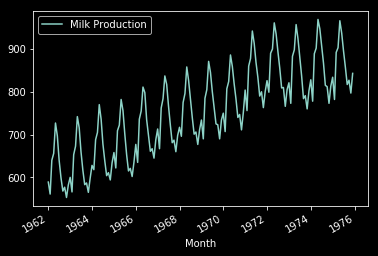

In [5]:
plt.style.use('dark_background')
df.plot()
plt.show()

### Train Test Split

** Let's attempt to predict a year's worth of data. (12 months or 12 steps into the future) **

** Create a test train split using indexing (hint: use .head() or tail() or .iloc[]). We don't want a random train test split, we want to specify that the test set is the last 12 months of data is the test set, with everything before it is the training. **

In [6]:
n_test_months = 12
df_train = df.head(df.shape[0]-n_test_months)
df_test = df.tail(n_test_months)

In [7]:
display(df_train)
display(df_test)

,Milk Production
Month,
1962-01-01 01:00:00,589.0
1962-02-01 01:00:00,561.0
1962-03-01 01:00:00,640.0
1962-04-01 01:00:00,656.0
1962-05-01 01:00:00,727.0
1962-06-01 01:00:00,697.0
1962-07-01 01:00:00,640.0
1962-08-01 01:00:00,599.0
1962-09-01 01:00:00,568.0


,Milk Production
Month,
1975-01-01 01:00:00,834.0
1975-02-01 01:00:00,782.0
1975-03-01 01:00:00,892.0
1975-04-01 01:00:00,903.0
1975-05-01 01:00:00,966.0
1975-06-01 01:00:00,937.0
1975-07-01 01:00:00,896.0
1975-08-01 01:00:00,858.0
1975-09-01 01:00:00,817.0


### Scale the Data

** Use sklearn.preprocessing to scale the data using the MinMaxScaler. Remember to only fit_transform on the training data, then transform the test data. You shouldn't fit on the test data as well, otherwise you are assuming you would know about future behavior!**

In [10]:
import sklearn
from sklearn import *

In [11]:
scaler = sklearn.preprocessing.MinMaxScaler()
scaler_fit_train = scaler.fit(df_train)
df_train_scaled = scaler_fit_train.transform(df_train)
df_test_scaled = scaler_fit_train.transform(df_test)

## Batch Function

** We'll need a function that can feed batches of the training data. We'll need to do several things that are listed out as steps in the comments of the function. Remember to reference the previous batch method from the lecture for hints. Try to fill out the function template below, this is a pretty hard step, so feel free to reference the solutions! **

In [12]:
def next_batch(training_data,steps):
    """
    INPUT: Data, Batch Size, Time Steps per batch
    OUTPUT: A tuple of y time series results. y[:,:-1] and y[:,1:]
    """
    
    # STEP 1: Use np.random.randint to set a random starting point index for the batch.
    # Remember that each batch needs have the same number of steps in it.
    # This means you should limit the starting point to len(data)-steps
    rnd_int = np.random.randint(0,len(training_data)-steps)
    
    # STEP 2: Now that you have a starting index you'll need to index the data from
    # the random start to random start + steps + 1. Then reshape this data to be (1,steps+1)
    batch = training_data[rnd_int:rnd_int+steps+1].reshape(1,steps+1)
    
    # STEP 3: Return the batches. You'll have two batches to return y[:,:-1] and y[:,1:]
    # You'll need to reshape these into tensors for the RNN to .reshape(-1,steps,1)
    return batch[:,:-1].reshape(-1,steps,1), batch[:,1:].reshape(-1,steps,1)

## Setting Up The RNN Model

** Import TensorFlow **

In [13]:
import tensorflow as tf

/Users/johnleonard/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


### The Constants

** Define the constants in a single cell. You'll need the following (in parenthesis are the values I used in my solution, but you can play with some of these): **
* Number of Inputs (1)
* Number of Time Steps (12)
* Number of Neurons per Layer (100)
* Number of Outputs (1)
* Learning Rate (0.03)
* Number of Iterations for Training (4000)
* Batch Size (1)

In [14]:
# define the constants
n_inputs = 1
n_time_steps = 12
n_neurons_per_HL = 100
n_outputs=1
learning_rate = 0.03
n_iterations = 4000

** Create Placeholders for X and y. (You can change the variable names if you want). The shape for these placeholders should be [None,num_time_steps-1,num_inputs] and [None, num_time_steps-1, num_outputs] The reason we use num_time_steps-1 is because each of these will be one step shorter than the original time steps size, because we are training the RNN network to predict one point into the future based on the input sequence.**  

In [15]:
#defines the placholders
x = tf.placeholder(tf.float32, shape = [None,n_time_steps, n_inputs],name='x')
y = tf.placeholder(tf.float32, shape = [None, n_time_steps, n_outputs],name='y')

** Now create the RNN Layer, you have complete freedom over this, use tf.contrib.rnn and choose anything you want, OutputProjectionWrappers, BasicRNNCells, BasicLSTMCells, MultiRNNCell, GRUCell etc... Keep in mind not every combination will work well! (If in doubt, the solutions used an Outputprojection Wrapper around a basic LSTM cell with relu activation.**

In [16]:
model = tf.contrib.rnn.OutputProjectionWrapper(
        tf.contrib.rnn.BasicLSTMCell(n_neurons_per_HL,activation=tf.nn.relu),
        n_outputs
)

Instructions for updating:
This class is deprecated, please use tf.nn.rnn_cell.LSTMCell, which supports all the feature this cell currently has. Please replace the existing code with tf.nn.rnn_cell.LSTMCell(name='basic_lstm_cell').


** Now pass in the cells variable into tf.nn.dynamic_rnn, along with your first placeholder (X)**

In [17]:
outputs, states = tf.nn.dynamic_rnn(model, x, dtype=tf.float32)

### Loss Function and Optimizer

** Create a Mean Squared Error Loss Function and use it to minimize an AdamOptimizer, remember to pass in your learning rate. **

In [18]:
loss = tf.reduce_mean(tf.square(y-outputs))
optimizer = tf.train.AdamOptimizer(learning_rate)
train = optimizer.minimize(loss)

** Initialize the global variables **

In [19]:
init = tf.global_variables_initializer()

** Create an instance of tf.train.Saver() **

In [20]:
saver = tf.train.Saver()

### Session

** Run a tf.Session that trains on the batches created by your next_batch function. Also add an a loss evaluation for every 100 training iterations. Remember to save your model after you are done training. **

In [21]:
with tf.Session() as sess:
    # CODE HERE!
    
    sess.run(init)
    
    for i in range(n_iterations):
        x_batch, y_batch = next_batch(df_train_scaled,n_time_steps)
        sess.run(train,feed_dict={x:x_batch,y:y_batch})
        
        if i% 100 == 0:
            RMSE_train = loss.eval(feed_dict={x:x_batch,y:y_batch})
            print(i,'\t RMSE_train:',RMSE_train)
            
    # Save Model for Later
    saver.save(sess, "./ex_time_series_model_1")

0 	 RMSE_train: 0.16772103
100 	 RMSE_train: 0.024713524
200 	 RMSE_train: 0.011362881
300 	 RMSE_train: 0.008628312
400 	 RMSE_train: 0.008760241
500 	 RMSE_train: 0.011374801
600 	 RMSE_train: 0.008396397
700 	 RMSE_train: 0.0065017417
800 	 RMSE_train: 0.007367987
900 	 RMSE_train: 0.008627849
1000 	 RMSE_train: 0.010997088
1100 	 RMSE_train: 0.010874819
1200 	 RMSE_train: 0.009207056
1300 	 RMSE_train: 0.009947398
1400 	 RMSE_train: 0.014658578
1500 	 RMSE_train: 0.005836982
1600 	 RMSE_train: 0.007478351
1700 	 RMSE_train: 0.0058657243
1800 	 RMSE_train: 0.0054878914
1900 	 RMSE_train: 0.0031523223
2000 	 RMSE_train: 0.0059138443
2100 	 RMSE_train: 0.0035777304
2200 	 RMSE_train: 0.003477818
2300 	 RMSE_train: 0.0021630237
2400 	 RMSE_train: 0.0084463125
2500 	 RMSE_train: 0.0027281307
2600 	 RMSE_train: 0.003485325
2700 	 RMSE_train: 0.0040826946
2800 	 RMSE_train: 0.0052891015
2900 	 RMSE_train: 0.0033896554
3000 	 RMSE_train: 0.0035894702
3100 	 RMSE_train: 0.0038386036
3200 	 

______

## Predicting Future (Test Data)

** Show the test_set (the last 12 months of your original complete data set) **

In [22]:
df_test

,Milk Production
Month,
1975-01-01 01:00:00,834.0
1975-02-01 01:00:00,782.0
1975-03-01 01:00:00,892.0
1975-04-01 01:00:00,903.0
1975-05-01 01:00:00,966.0
1975-06-01 01:00:00,937.0
1975-07-01 01:00:00,896.0
1975-08-01 01:00:00,858.0
1975-09-01 01:00:00,817.0


** Now we want to attempt to predict these 12 months of data, using only the training data we had. To do this we will feed in a seed training_instance of the last 12 months of the training_set of data to predict 12 months into the future. Then we will be able to compare our generated 12 months to our actual true historical values from the test set! **

# Generative Session
### NOTE: Recall that our model is really only trained to predict 1 time step ahead, asking it to generate 12 steps is a big ask, and technically not what it was trained to do! Think of this more as generating new values based off some previous pattern, rather than trying to directly predict the future. You would need to go back to the original model and train the model to predict 12 time steps ahead to really get a higher accuracy on the test data. (Which has its limits due to the smaller size of our data set)
** Fill out the session code below to generate 12 months of data based off the last 12 months of data from the training set. The hardest part about this is adjusting the arrays with their shapes and sizes. Reference the lecture for hints.**

In [25]:
predicted_time_steps = 12

with tf.Session() as sess:
    
    # Use your Saver instance to restore your saved rnn time series model
    saver.restore(sess, "./ex_time_series_model_1")
    
    seed = list(df_train_scaled[-12:])
    
    for i in range(predicted_time_steps):
        x_batch = np.array(seed[-n_time_steps:]).reshape(1, n_time_steps, 1)
        y_pred = sess.run(outputs, feed_dict={x: x_batch})
        seed.append(y_pred[0, -1, 0])

    # CODE HERE!

INFO:tensorflow:Restoring parameters from ./ex_time_series_model_1


** Show the result of the predictions. **

In [26]:
y_pred

array([[[0.6177379 ],
        [0.6271055 ],
        [0.64645463],
        [0.81271315],
        [0.9851303 ],
        [1.0262661 ],
        [0.96236634],
        [0.8046483 ],
        [0.71798617],
        [0.67195094],
        [0.66532123],
        [0.69999707]]], dtype=float32)

** Grab the portion of the results that are the generated values and apply inverse_transform on them to turn them back into milk production value units (lbs per cow). Also reshape the results to be (12,1) so we can easily add them to the test_set dataframe.**

In [29]:
df_test_pred = scaler_fit_train.inverse_transform(np.array(seed[12:]).reshape(12,1))

** Create a new column on the test_set called "Generated" and set it equal to the generated results. You may get a warning about this, feel free to ignore it.**

In [30]:
df_test['y_pred'] = df_test_pred

/Users/johnleonard/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


** View the test_set dataframe. **

In [31]:
df_test

,Milk Production,y_pred
Month,,
1975-01-01 01:00:00,834.0,830.392822
1975-02-01 01:00:00,782.0,801.070435
1975-03-01 01:00:00,892.0,902.328979
1975-04-01 01:00:00,903.0,920.685303
1975-05-01 01:00:00,966.0,1016.959595
1975-06-01 01:00:00,937.0,1000.247009
1975-07-01 01:00:00,896.0,956.087280
1975-08-01 01:00:00,858.0,896.304810
1975-09-01 01:00:00,817.0,860.795532


** Plot out the two columns for comparison. **

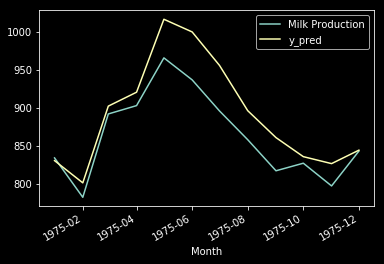

In [32]:
df_test.plot()

# Great Job!

Play around with the parameters and RNN layers, does a faster learning rate with more steps improve the model? What about GRU or BasicRNN units? What if you train the original model to not just predict one timestep ahead into the future, but 3 instead? Lots of stuff to add on here!